A project that will consist in the use of Machine Learning algorithms and their application to improve the performance of a sales site, having databases defined by accesses its predecessors on various days of the year. Very demanding periods as well as less crowded periods will be taken into account.
This implementation aims to help in the distribution of hardware resources and the optimization of the site's operation.
The project will realize the design of the new algorithm. It will take into account the optimization of the response time, the definition of the moments when the back-up is done for the database, the generation of statistics regarding the resources necessary for operation

## Importing the libraries 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Reading the Data

The data has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Email: Email of the Customer.
* Address: Address of the Customer.
* Avatar: Avatar or Alias of the Customer.
* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 
* Yearly Amount Spend: Total amount of money spend by the customer yearly.
* Timestamp: Data and time of collection
* Day_of_Week: extracted day of week
* App_Response_Time: This variable represents the amount of time (seconds) it takes for the app to process a user's request and return the corresponding data or result
* Website_Response_Time: This variable represents the amount of time (seconds) it takes for the website to process a user's request and return the corresponding data or result

In [49]:
# Loading the data as a comma-separated file
data_csv = pd.read_csv('Data.txt')

data_csv['Timestamp'] = pd.to_datetime(data_csv['Timestamp'])

# Displaying the first few rows to understand its content
df = data_csv

**Checking out the head of Ecommerce Customers, and checking out its info and descriptive statistic**

In [50]:
data_csv.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent',
       'Timestamp', 'Day_of_Week', 'App_Response_Time',
       'Website_Response_Time'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Email                  500 non-null    object        
 1   Address                500 non-null    object        
 2   Avatar                 500 non-null    object        
 3   Avg. Session Length    500 non-null    float64       
 4   Time on App            500 non-null    float64       
 5   Time on Website        500 non-null    float64       
 6   Length of Membership   500 non-null    float64       
 7   Yearly Amount Spent    500 non-null    float64       
 8   Timestamp              500 non-null    datetime64[ns]
 9   Day_of_Week            500 non-null    object        
 10  App_Response_Time      500 non-null    float64       
 11  Website_Response_Time  500 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 47.0+ 

In [52]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,App_Response_Time,Website_Response_Time
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038,2.850138,2.696684
std,0.992563,0.994216,1.010489,0.999278,79.314782,1.510389,1.508101
min,29.532429,8.508152,33.913847,0.269901,256.670582,0.127081,0.119274
25%,32.341822,11.388153,36.349257,2.930450,445.038277,1.554493,1.414494
50%,33.082008,11.983231,37.069367,3.533975,498.887875,2.937595,2.700404
75%,33.711985,12.753850,37.716432,4.126502,549.313828,4.213257,3.931951
max,36.139662,15.126994,40.005182,6.922689,765.518462,5.401185,5.433036


## Exploratory Data Analysis

**Let's explore the data!**

**Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.**

**Plotting seaborn's pairplot to explore the types of relationships across the entire data set.**

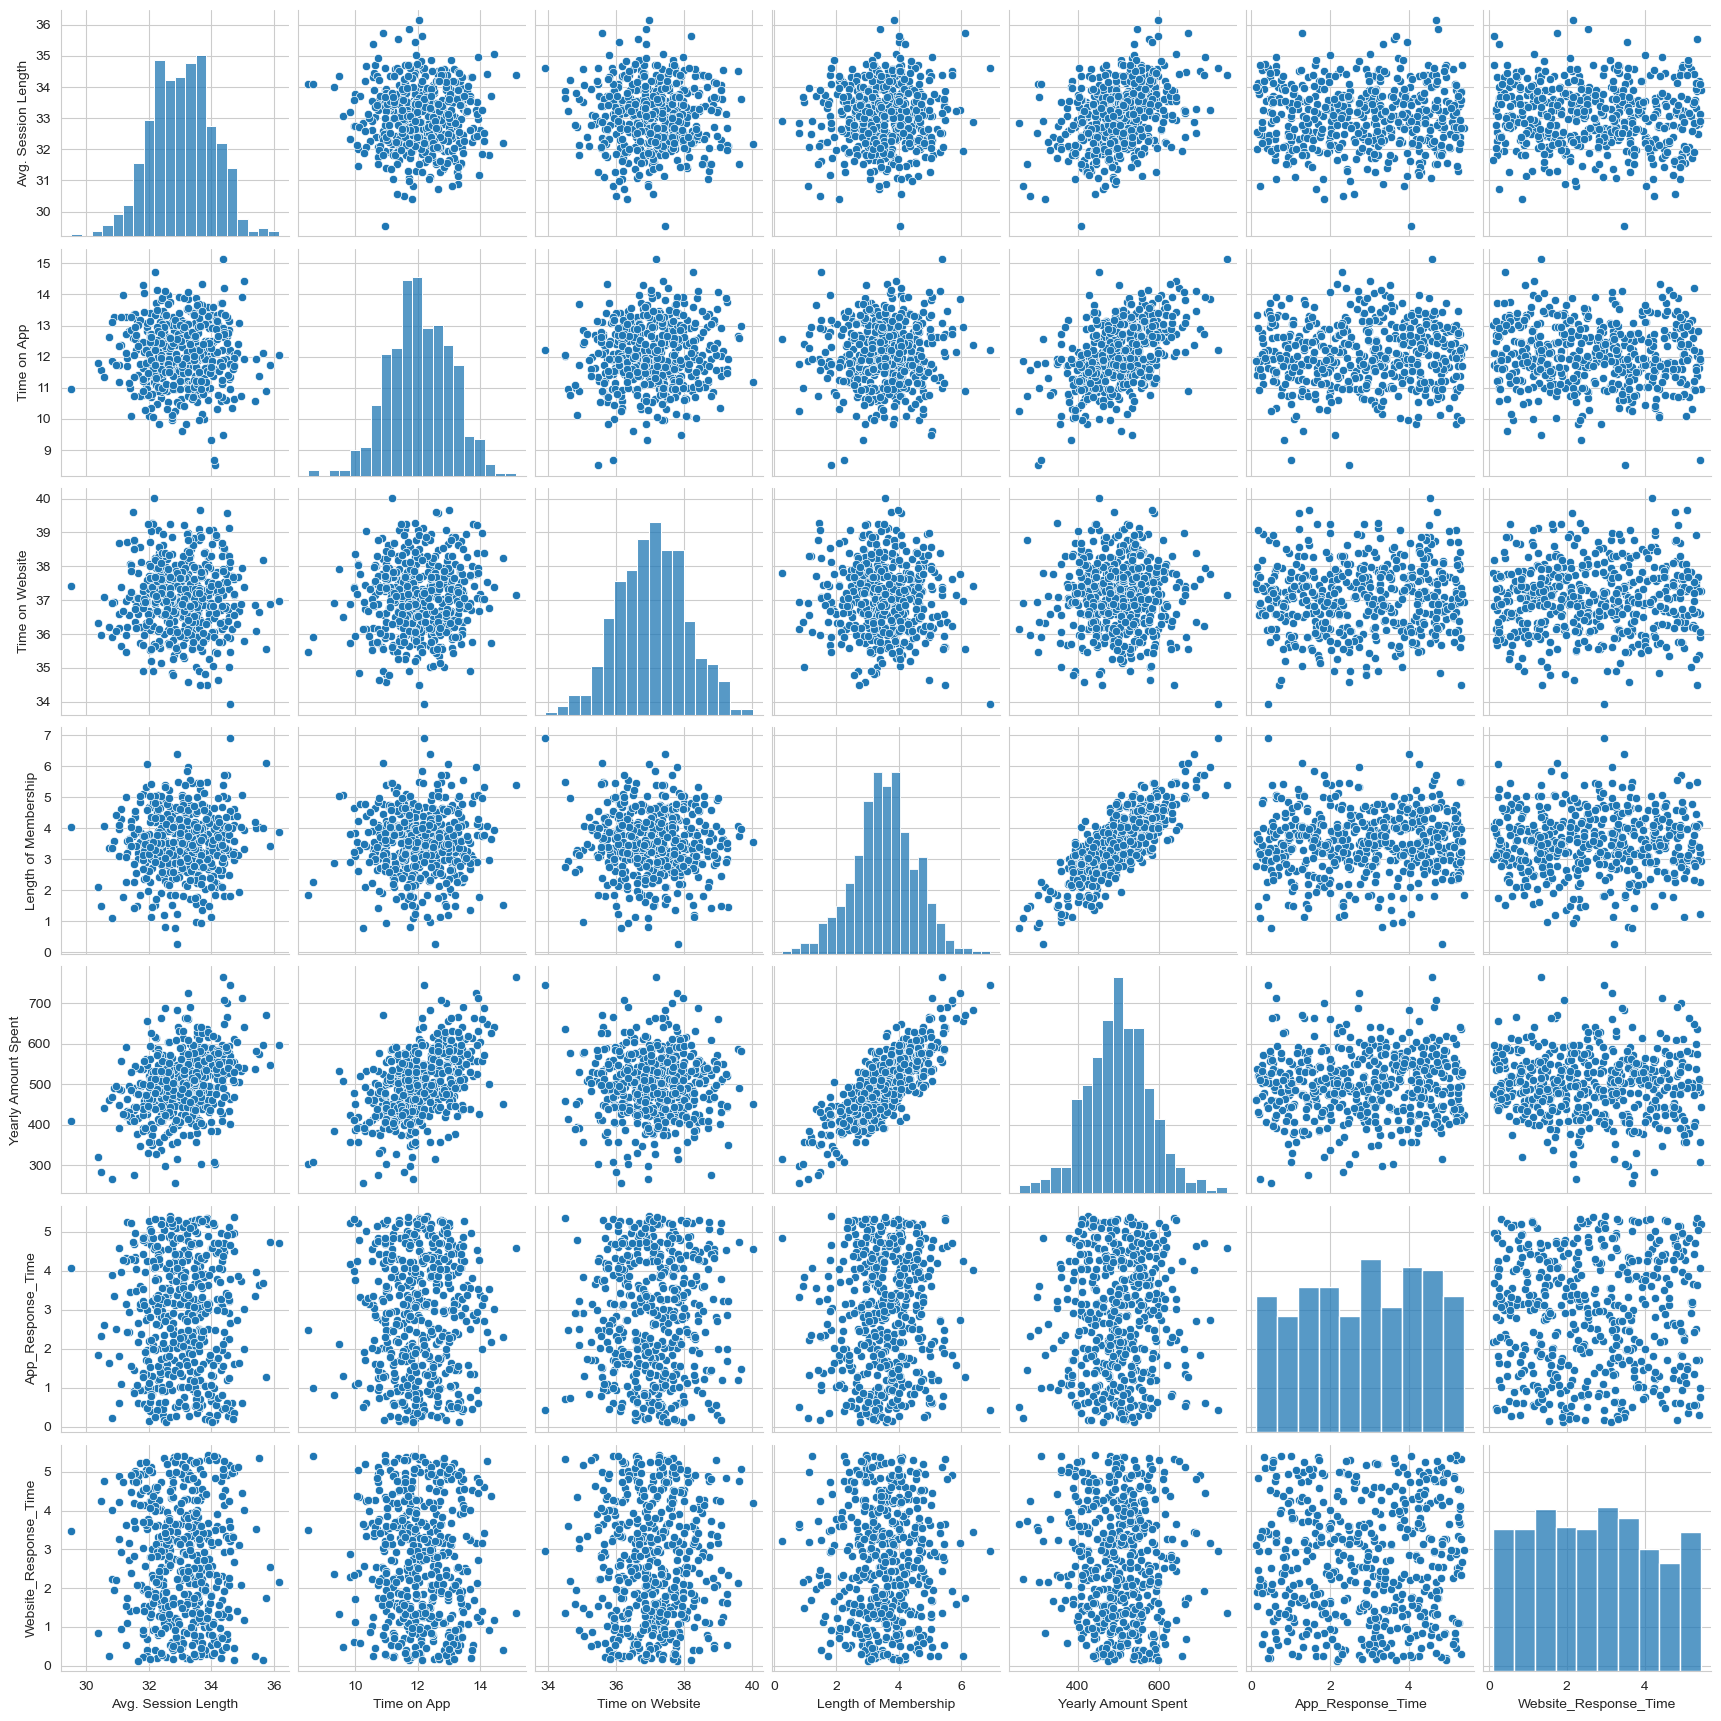

In [53]:
sns.set_style('whitegrid')
sns.pairplot(df,palette="GnBu_d")

<Axes: >

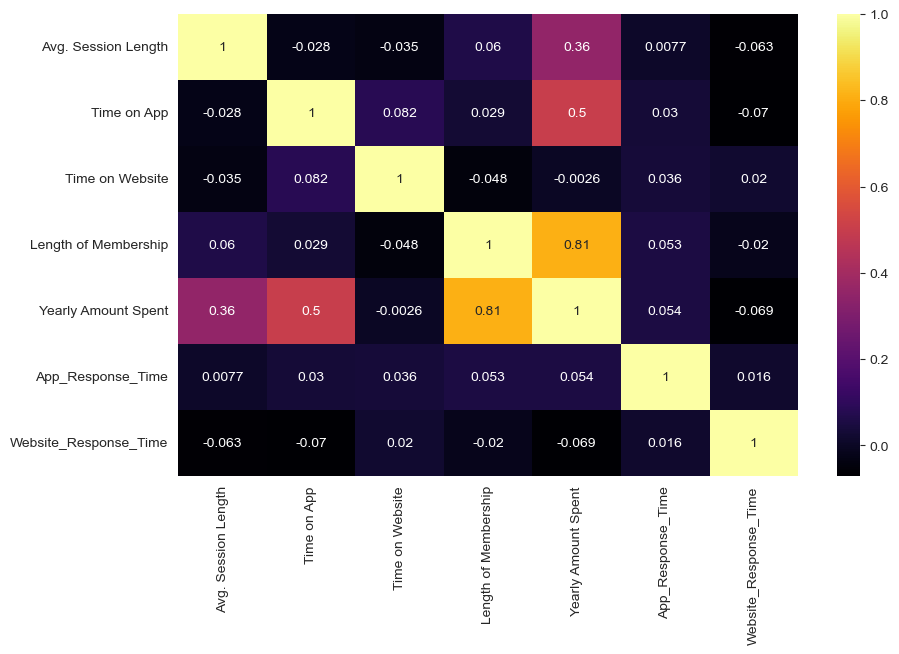

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='inferno',annot=True,)

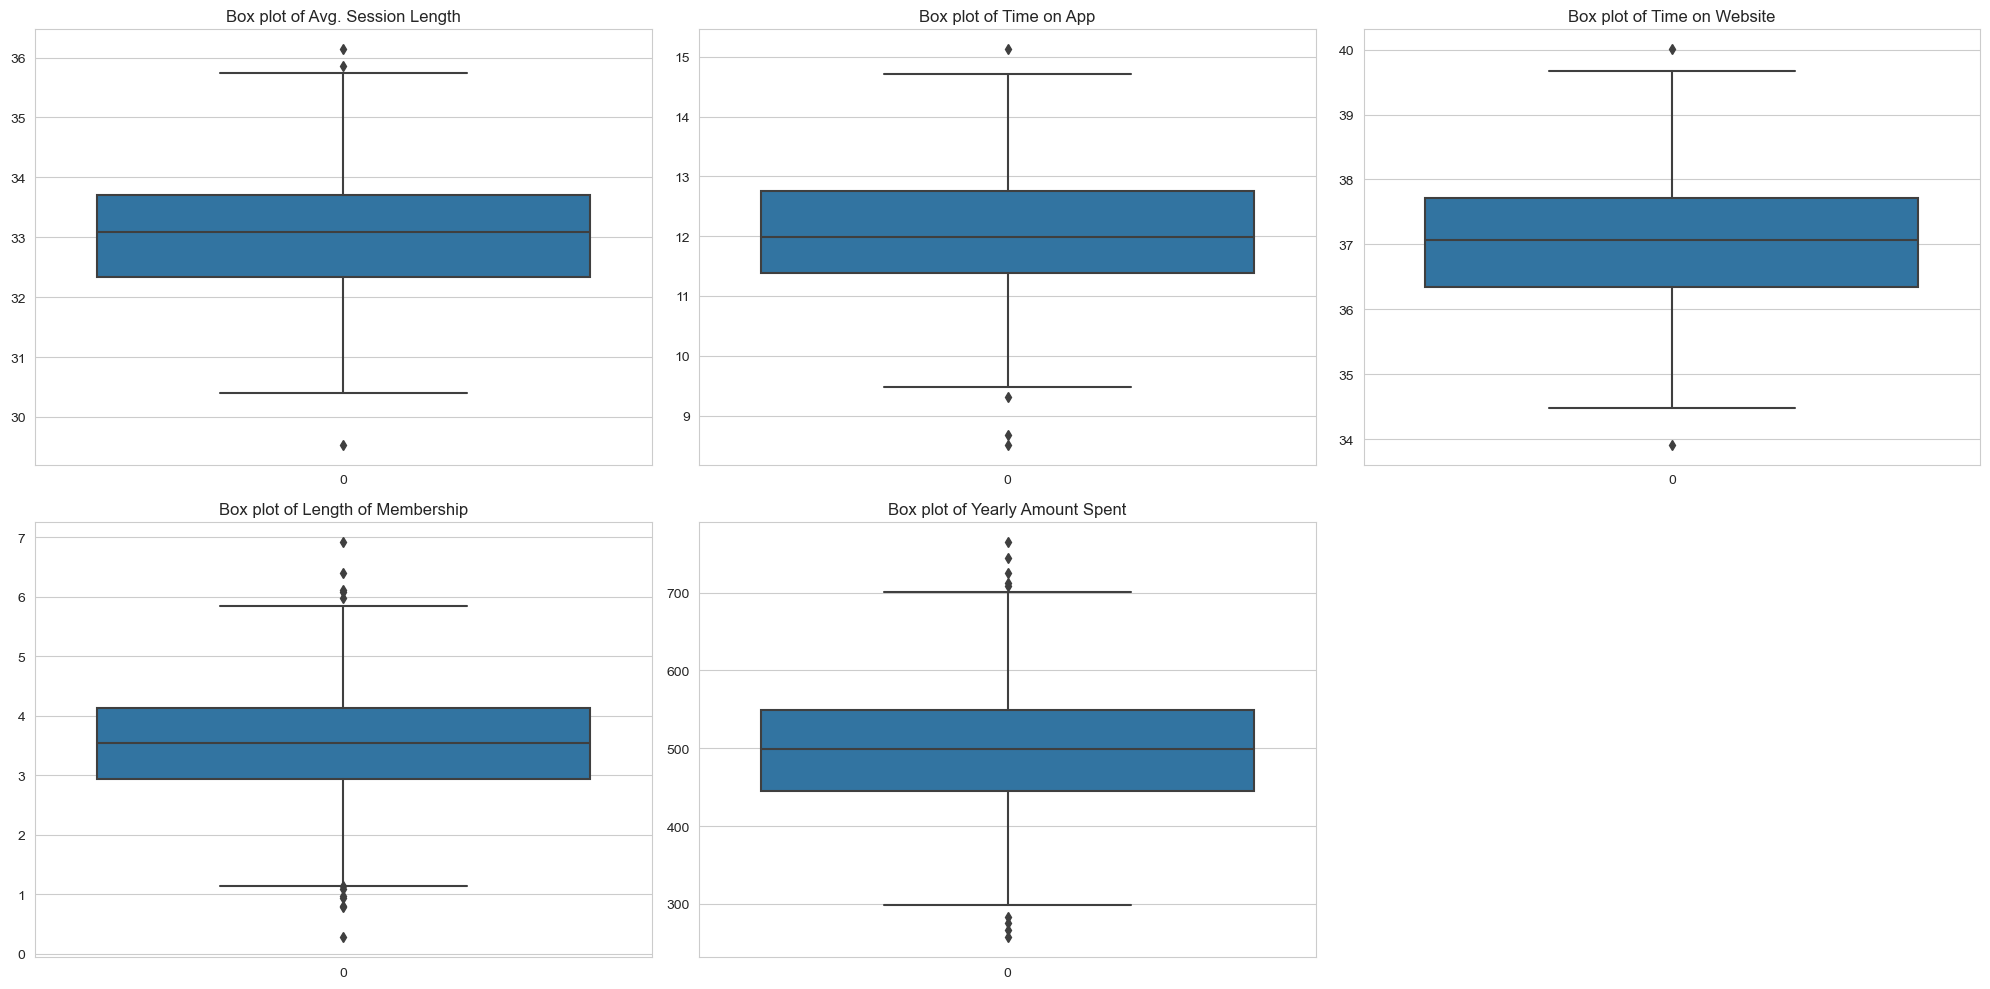

In [55]:
# List of columns for univariate analysis
columns = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

# Plotting box plots for key metrics to identify outliers
plt.figure(figsize=(20, 10))

for i, column in enumerate(columns, 1):  
    plt.subplot(2, 3, i)
    sns.boxplot(data_csv[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()


**Creating a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

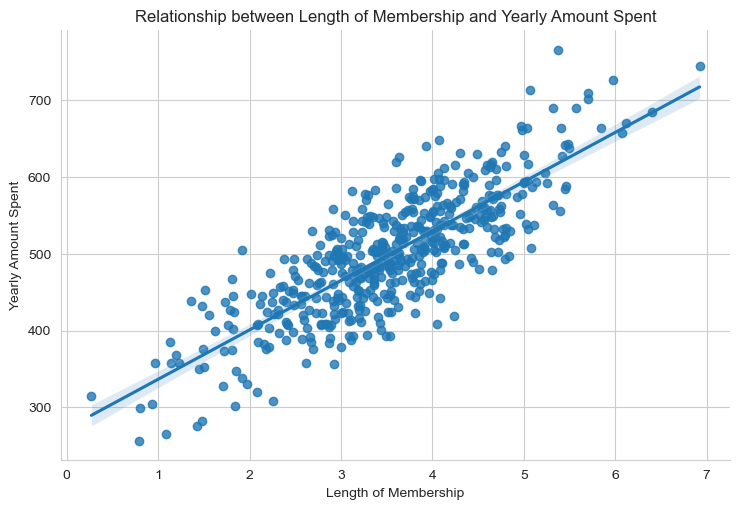

In [56]:
# Plotting the relationship using lmplot
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df, aspect=1.5)
plt.title('Relationship between Length of Membership and Yearly Amount Spent')
plt.show()

**The Length of Membership and Yearly Amount Spent are postively Coorelated means higher the Legth of Membershiphigher will be the spending of the customer.**

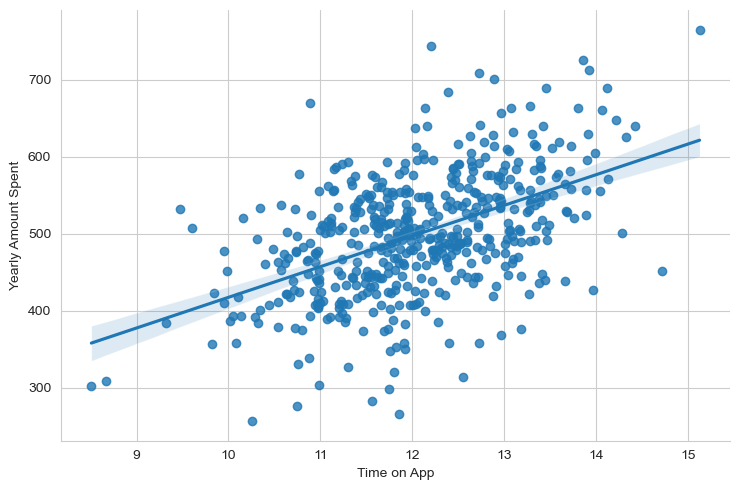

In [57]:
sns.lmplot(x='Time on App', y='Yearly Amount Spent', data=df, aspect=1.5)

**The Time on App and Yearly Amount Spent are postively Coorelated means higher the time spend on app higher will be the spending of the customer.**

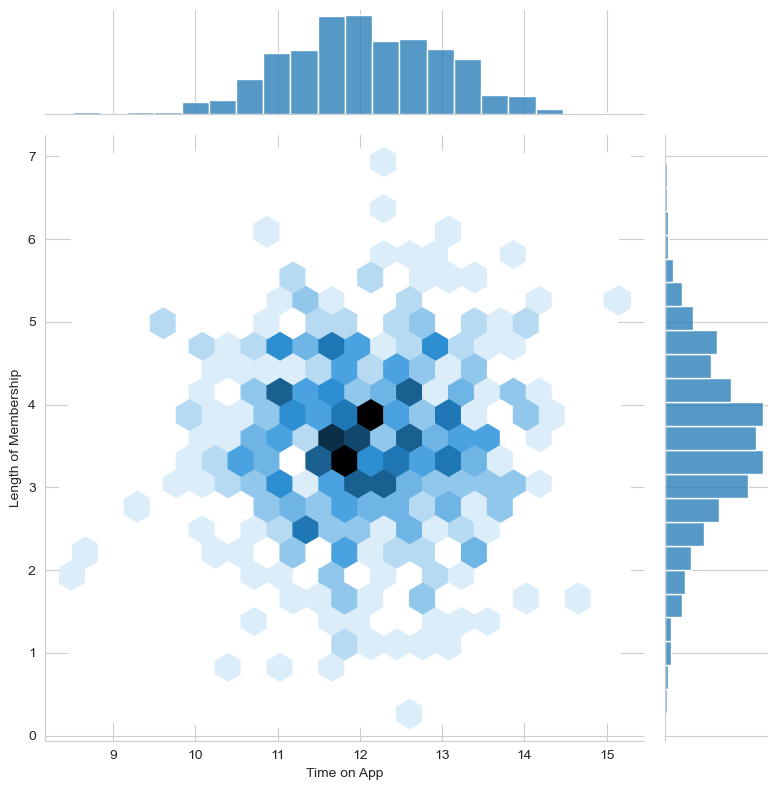

In [58]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=df,height=8)

**Finding the top 3 most popular Avatars.**

In [59]:
df['Avatar'].value_counts().head(3)

SlateBlue    7
Cyan         7
CadetBlue    7
Name: Avatar, dtype: int64

**Finding the top 3 most popular email providers/hosts.**

In [60]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Timestamp,Day_of_Week,App_Response_Time,Website_Response_Time
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,2022-01-01,Saturday,1.210735,2.142600
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,2022-01-02,Sunday,4.731424,5.048046
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,2022-01-03,Monday,1.011479,1.603486
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,2022-01-04,Tuesday,4.956287,0.197885
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,2022-01-05,Wednesday,5.207131,5.302106


In [25]:
df['Email'].apply(lambda x: x.split('@')[1]).value_counts().head(3)

gmail.com      87
hotmail.com    87
yahoo.com      76
Name: Email, dtype: int64

# Preparing the data


In [61]:
#Creating new features

# Interaction between features
df['Website_vs_App_Time_Ratio'] = df['Time on Website'] / df['Time on App']
df['Session_to_Membership_Ratio'] = df['Avg. Session Length'] / df['Length of Membership']

# Polynomial features
df['Membership_Squared'] = df['Length of Membership'] ** 2

# Aggregated features
df['Total_Time'] = df['Time on App'] + df['Time on Website']
# Displaying the first few rows with the new features
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Timestamp,Day_of_Week,App_Response_Time,Website_Response_Time,Website_vs_App_Time_Ratio,Session_to_Membership_Ratio,Membership_Squared,Total_Time
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,2022-01-01,Saturday,1.210735,2.142600,3.127272,8.449785,16.667791,52.233319
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,2022-01-02,Sunday,4.731424,5.048046,3.354705,11.984183,7.097078,48.378420
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,2022-01-03,Monday,1.011479,1.603486,3.275347,8.040094,16.847275,48.440875
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,2022-01-04,Tuesday,4.956287,0.197885,2.676963,10.994741,9.735516,50.438796
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,2022-01-05,Wednesday,5.207131,5.302106,2.933654,7.496258,19.769658,50.331842


- Website_vs_App_Time_Ratio: This ratio indicates the preference of a user for the website versus the app. A higher ratio suggests more time spent on the website compared to the app.
- Session_to_Membership_Ratio: This ratio compares the average session length to the length of membership. A higher ratio might suggest that newer members have longer sessions or vice-versa.
- Membership_Squared: A polynomial feature that captures non-linear relationships between membership length and the target variable.
- Total_Time: Represents the combined time a user spends on both the app and website.

## Backup Scheduling

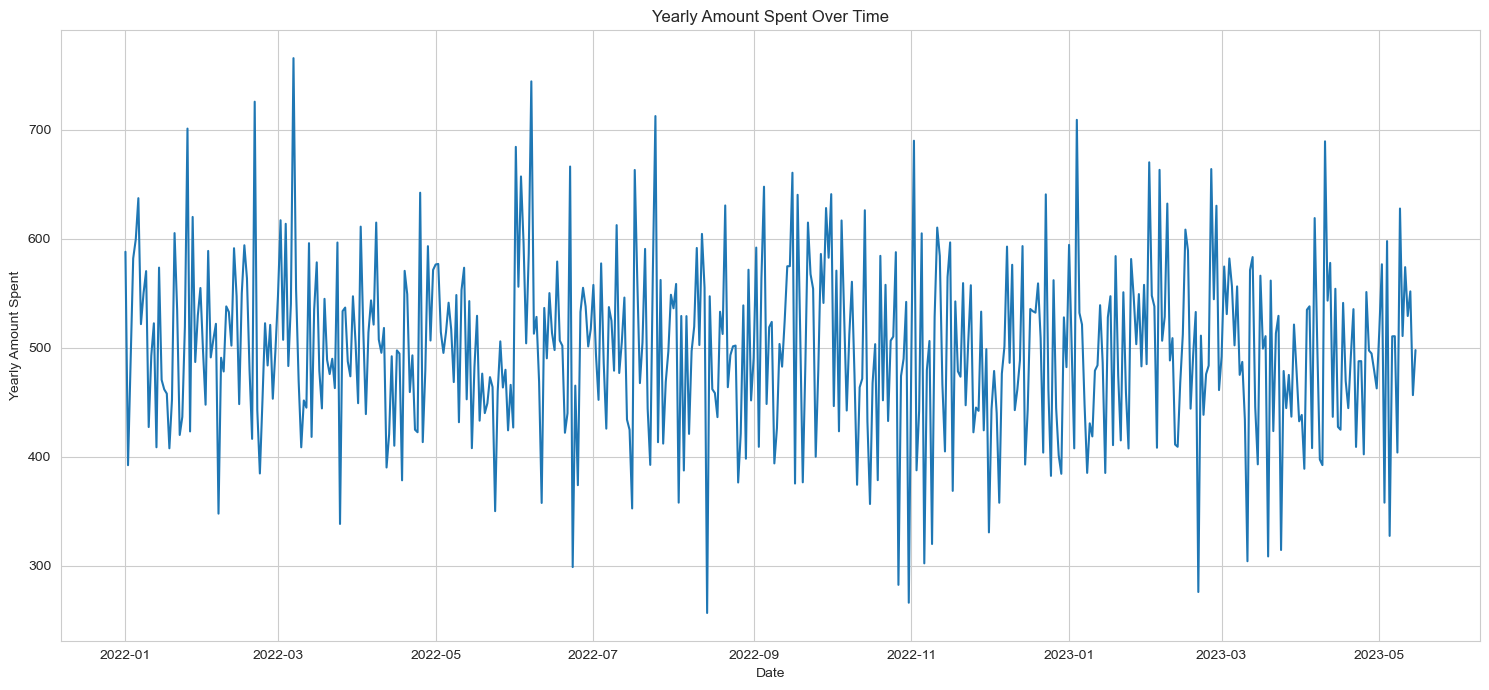

In [62]:
# Plotting 'Yearly Amount Spent' over time
plt.figure(figsize=(15, 7))
sns.lineplot(x=data_csv['Timestamp'], y=data_csv['Yearly Amount Spent'])
plt.title('Yearly Amount Spent Over Time')
plt.xlabel('Date')
plt.ylabel('Yearly Amount Spent')
plt.tight_layout()
plt.show()

We observe certain periods where the Yearly Amount Spent is relatively low. These dips might correspond to periods of reduced activity, making them potential candidates for backup scheduling.
There also seem to be some patterns or cycles in the data, which might correspond to weekly or monthly trends

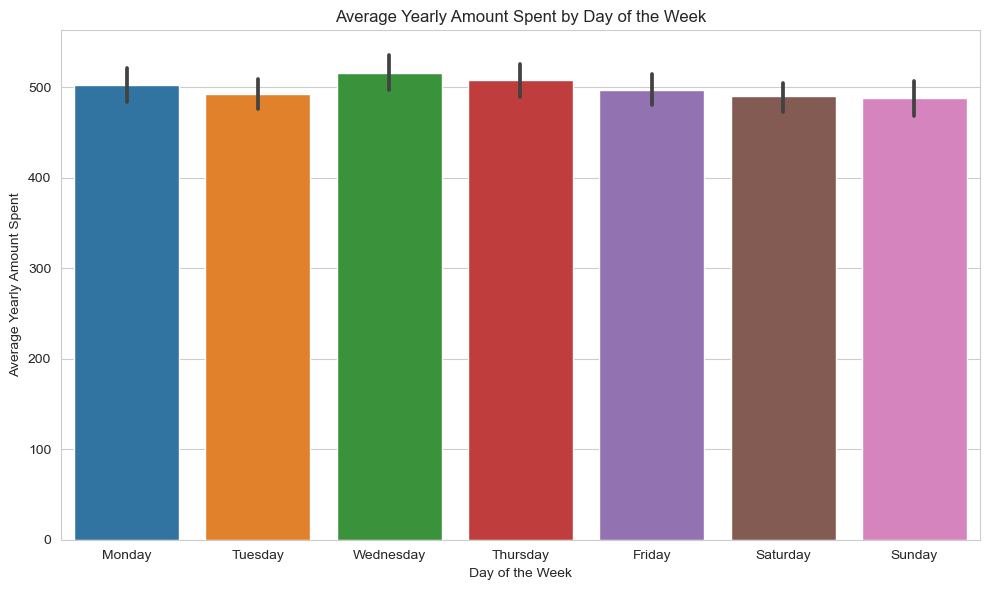

In [64]:
# Extracting day of the week from the Timestamp
data_csv['Day_of_Week'] = data_csv['Timestamp'].dt.day_name()

# Plotting average 'Yearly Amount Spent' for each day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=data_csv['Day_of_Week'], y=data_csv['Yearly Amount Spent'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Yearly Amount Spent by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Yearly Amount Spent')
plt.tight_layout()
plt.show()

Thursday seem to have the lowest average sales, followed closely by Tuesdays.
Fridays and Saturdays have the highest average sales.
Given this analysis, Sundays and possibly Tuesdays might be good candidates for backup scheduling due to their lower average sales (and presumably lower activity)

## Clustering

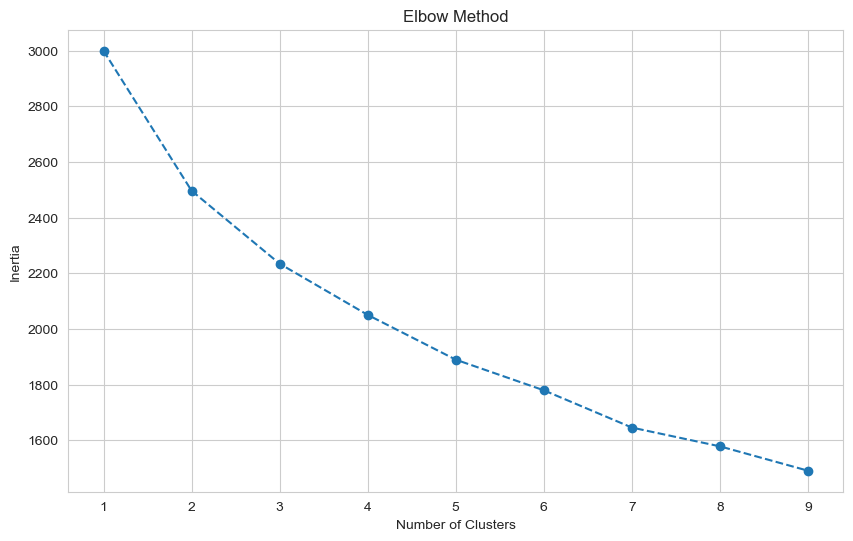

In [65]:
from sklearn.preprocessing import StandardScaler

# Selecting relevant features
features_for_clustering = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Yearly Amount Spent',
                          'App_Response_Time','Website_Response_Time']
data_cluster = data_csv[features_for_clustering]

# Scaling the features
scaler = StandardScaler()
data_cluster_scaled = scaler.fit_transform(data_cluster)

from sklearn.cluster import KMeans

# Determining the optimal number of clusters using the Elbow Method
inertia_values = []
range_clusters = range(1, 10)  # Checking for up to 10 clusters

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_cluster_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Based on the elbow method graph illustrates the inertia (sum of squared distances from points to their assigned centers) for different numbers of clusters. While there isn't a sharply defined "elbow," we can observe that the inertia starts to level off around k=3 or k=4. This suggests that 3 or 4 clusters might be a reasonable choice for this data.

In [67]:
# Applying K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
data_csv['Cluster'] = kmeans.fit_predict(data_cluster_scaled)

# Calculating the cluster centroids
cluster_centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Creating a DataFrame to display the cluster centroids
clusters_df = pd.DataFrame(cluster_centroids, columns=features_for_clustering)
clusters_df

,Avg. Session Length,Time on App,Time on Website,Yearly Amount Spent,App_Response_Time,Website_Response_Time
0,33.279991,11.774018,36.755058,488.446919,1.532319,2.373699
1,33.532761,12.866528,37.218901,571.455974,3.609010,2.476716
2,32.358340,11.604811,37.250366,444.405551,3.600050,3.256918


Given our goal of backup scheduling, we should focus on the cluster with the lowest Yearly Amount Spent as a potential representative of low activity. In this case, that's Cluster 2. Dusring this time the the responce rat is usually high due to low traffic

In [69]:
date_range = df['Timestamp']

# Re-selecting and scaling the features for clustering
features_for_clustering = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Yearly Amount Spent']
data_cluster = df[features_for_clustering]
scaler = StandardScaler()
data_cluster_scaled = scaler.fit_transform(data_cluster)

# Re-applying K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
data_csv['Cluster'] = kmeans.fit_predict(data_cluster_scaled)

# Extracting the backup dates for Cluster 2
backup_dates = df[df['Cluster'] == 2]['Timestamp']

# Displaying the first 20 backup dates
backup_dates.head(20)

0    2022-01-01
7    2022-01-08
14   2022-01-15
17   2022-01-18
18   2022-01-19
19   2022-01-20
20   2022-01-21
21   2022-01-22
22   2022-01-23
27   2022-01-28
33   2022-02-03
35   2022-02-05
40   2022-02-10
44   2022-02-14
45   2022-02-15
54   2022-02-24
56   2022-02-26
62   2022-03-04
69   2022-03-11
73   2022-03-15
Name: Timestamp, dtype: datetime64[ns]

The first 20 dates from Cluster 1, which, based on our analysis, might be ideal candidates for backups due to their association with lower Yearly Amount Spent (and potentially lower site activity

## Predictive Modeling for Response Time

In [89]:
# Features and Target for Website
X = data_csv[['Avg. Session Length', 'Time on Website', 'Yearly Amount Spent', 'Length of Membership', 'Cluster', 'Time on App']]
y = data_csv['Website_Response_Time']

**Normalizing the 'Avg. Session Length',  'Time on App',  'Time on Website',  'Length of Membership' columns , Website_Response_Time.**

**Import StandardScaler from sklearn.preprocessing**

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
SS = StandardScaler()
SS.fit(X)
scaled = SS.transform(X)

In [93]:
X = pd.DataFrame(scaled,columns=[['Avg. Session Length','Yearly Amount Spent','Time on Website', 'Length of Membership', 'Cluster', 'Time on App']])

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [77]:
from sklearn.linear_model import LinearRegression

**Creating an instance of a LinearRegression() model named lm.**

In [95]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [96]:
lm.fit(X_train,y_train)

LinearRegression()

**Printing out the coefficients of the model**

In [97]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.29245211  0.16155423 -0.02330452 -0.09355179 -0.25948464 -0.06783325]


In [98]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.29245211  0.16155423 -0.02330452 -0.09355179 -0.25948464 -0.06783325]


## Predicting Test Data
After fitting our model, let's evaluate its performance by predicting off the test values!

** Using lm.predict() to predict off the X_test set of the data.**

In [99]:
predictions = lm.predict( X_test)

** Creating a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

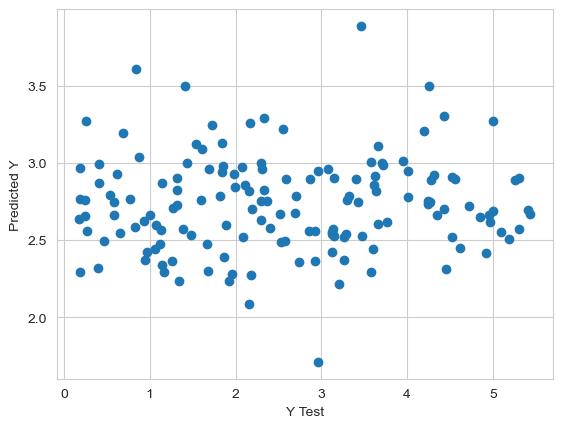

In [100]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [101]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.2677019420193347
MSE: 2.2063217998285114
RMSE: 1.4853692469647106


## Residuals

 explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

<Axes: xlabel='Website_Response_Time', ylabel='Density'>

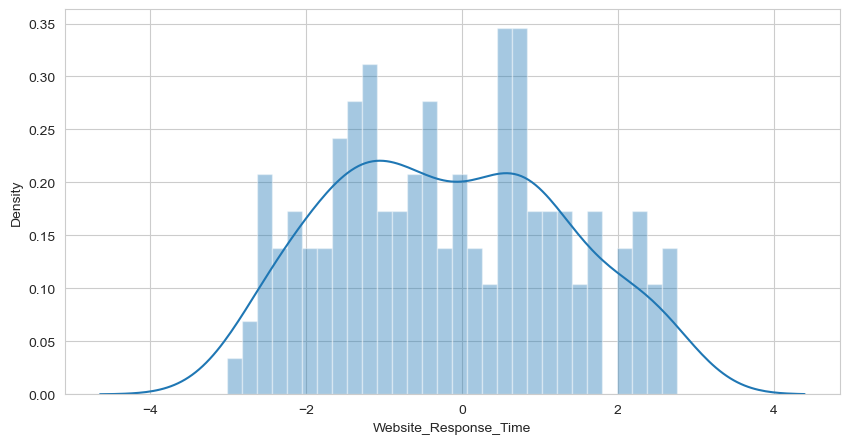

In [102]:
plt.figure(figsize=(10,5))
sns.distplot((y_test-predictions),bins=30)

## Conclusion
Let's interpret the coefficients to get an idea to the answer the question, where do we need to focus our efforts, on mobile app or on website development? 

In [103]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,-0.292452
Yearly Amount Spent,0.161554
Time on Website,-0.023305
Length of Membership,-0.093552
Cluster,-0.259485
Time on App,-0.067833


Interpreting the coefficients:

- Avg. Session Length: Longer sessions are associated with faster website response times.
- Yearly Amount Spent: Higher spenders tend to experience slightly longer response times.
- Time on Website: There's a weak negative relationship, suggesting minimal impact on response time.
- Length of Membership: Longer-term members experience marginally faster response times.
- Cluster: user who spend less time annually experience faster response times than others.
- Time on App: A weak negative relationship exists, implying users who spend more time on the app might experience slightly faster website response times